# Setup inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline

# Carga fichero

In [2]:
df = pd.read_csv('../data/coches-de-segunda-mano-sample.csv')
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

# Limpieza datos 

In [4]:
# estudiamos nulos marcas

df.fillna({'make':'INVICTA'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             50000 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [5]:
#estudiamos nulos modelos

df.loc[1330,'model'] = 'Córdoba'
df.loc[25574,'model'] = 'Toledo'
df.loc[31826,'model'] = 'Toledo'
df.loc[32831,'model'] = 'León'
df.loc[37683,'model'] = 'Toledo'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             50000 non-null  object 
 3   model            50000 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [6]:
#categorizamos campo kms

df['kms_cat'] = pd.qcut(df.kms,10)
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date,kms_cat
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00,"(192220.0, 241000.0]"
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00,"(25582.2, 51021.0]"
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00,"(99999.0, 127141.4]"
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00,"(99999.0, 127141.4]"
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00,"(99999.0, 127141.4]"


# Brainstorming cuestiones

**Marca**
- ¿Cuántas marcas hay?
- ¿Cuántos coches hay de cada marca?

**Modelo**
- ¿Cuantos modelos hay?
- ¿Cuantos modelos tiene cada marca?
- ¿Cuantos coches hay de cada modelo?


**Precio**
- ¿Cual es la distribución de precios?
- ¿Cual es la marca más cara? 
- ¿Existen conjuntos de marcas con precios similares que se puedan agrupar?
- ¿Cual es el modelo más caro? ¿y el más barato?
- ¿Existen conjuntos de modelos con precios similares que se puedan agrupar?

**Precio financiado**
- ¿Cual es el % de coches que permiten financiación?
- ¿Hay relación de vendedores que permiten financiación?
- ¿Cuál es el % de descuento por financiar? ¿Es fijo por vendedor o varía?

**Combustibles**
- ¿Cual es la distribución de combustibles?
- ¿Cuáles son más baratos?
- A igualdad de modelo, es más barato un diésel o un gasolina?

**Antigüedad**
- ¿Cual es el año medio de los coches anunciados?
- ¿Hay marcas que son significativamente más antiguas o más nuevas? ¿y modelos?
- ¿Existe relación entre antiguedad y precio?

**Kilómetros**
- ¿Cual es la distribución de kilómetros?
- ¿Hay marcas y/o modelos que se venden con más kilómetros que otros? 
- ¿Existe relación entre kilometraje y precio? 
- ¿Existe relación entre kilometraje y año? 
- ¿Se puede apreciar algún salto de precio en función de los kilómetros a igualdad de marca y modelo? ¿y si añadimos el año?

**Número de puertas**
- ¿Cuántos números de puertas distintos tenemos?
- A igualdad de modelo y año, o modelo y kilómetros, ¿existe relación entre precio y número de puertas?

**Caja de cambios**
- ¿Cuantos tipos de cambio distintos hay? 
- ¿Existe relación de precio? 
- ¿Hay relación con alguna variable como el combustible o la marca?

**Color**
- ¿Cuantos colores distintos hay? 
- Distribución de marcas y modelos por color. ¿Hay alguno que destaque? 
- ¿Puede existir alguna relación entre precio y color? ¿y entre año y color?

**Tipo de vendedor**
- ¿Cual es la proporción de vendedores particulares y profesionales? 
- ¿Existe alguna relación con las marcas? 
- A igualdad de modelo, ¿hay diferencias de precio entre particulares y profesionales?
- ¿Existe alguna relación entre el tipo de vendedor y el número de fotos?

**Nombre del vendedor**
- ¿Cuantos vendedores profesionales hay? 
- ¿Hay alguno especializado en alguna marca en especial? 
- ¿Podemos ver que alguno sea más caro que otros? 
- ¿Alguno destaca por poner más fotografías?
- ¿Existe alguna relación entre el precio y el número de fotografías?
- ¿Y entre el número de fotos y la marca y modelo?

**Provincia**
- ¿Cuantos coches se venden en cada provincia? 
- ¿Cual es el precio medio de venta en cada provincia? 
- ¿Se venden más coches de algún color en alguna provincia? 
- ¿En qué provincia se venden los coches con menos km? ¿y con más?

**Fecha de publicación**
- ¿Existe alguna relación entre la fecha de publicación y el precio a igualdad de modelo y kilometraje?

# Preguntas

**Datos Macro**
- Top 10 marcas más vendidas
- Top 15 modelos más vendidos
- Precio medio de coches en venta
- Distribución de combustibles
- Distribución de cajas de cambios
- Distribución colores

**Coche promedio**
- Antigüedad media
- Kilometraje medio
- Potencia media
- Combustible máximo
- Número de puertas máximo
- Caja de cambios máximo
- Color máximo
- Calcular precio para el coche promedio. ¿Se aleja de la media de coches en venta? Intentar justificar el por qué.

**Relaciones características-precio**
- Existe alguna relación entre el tipo de combustible y el precio? A igualdad de antigüedad y kilometraje.
- Existe alguna relación entre la antigüedad y el precio? Le afecta el kilometraje y el combustible?
- Existe alguna relación entre el kilometraje y el precio y el precio? Le afecta la antigüedad y el combustible?

**Datos comerciales**
- Distribución de vendedores profesionales-particulares
- Top 10 vendedores con más anuncios. Precio medio de anuncio en vendedores profesionales. Hay diferencias significativas?
- Existen diferencias de precios entre vendedores profesionales y particulares?

**Datos geográficos**
- Distribución de anuncios por provincia
- Cuál es el precio medio por provincia?
- Top 10 de provincias más caras/baratas. Existen diferencias significativas?
- Distribución de colores vendidos por provincia. Hay algún dato significativo?
- Distribución de combustibles por provincia. Hay algún dato significativo?
- Distribución de antigüedad por provincia. Hay algún dato significativo?
- Dónde se venden más coches eléctricos?

# Análisis

## Datos Macro

- Top 10 marcas más vendidas
- Top 15 modelos más vendidos
- Precio medio de coches en venta
- Distribución de combustibles
- Distribución de cajas de cambios
- Distribución colores

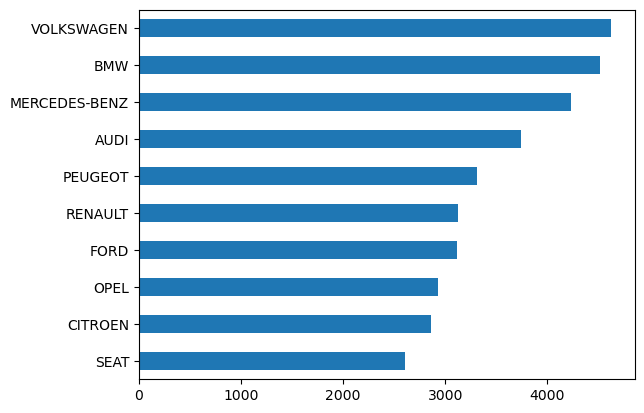

In [7]:
df['make'].value_counts().head(10).sort_values().plot.barh();

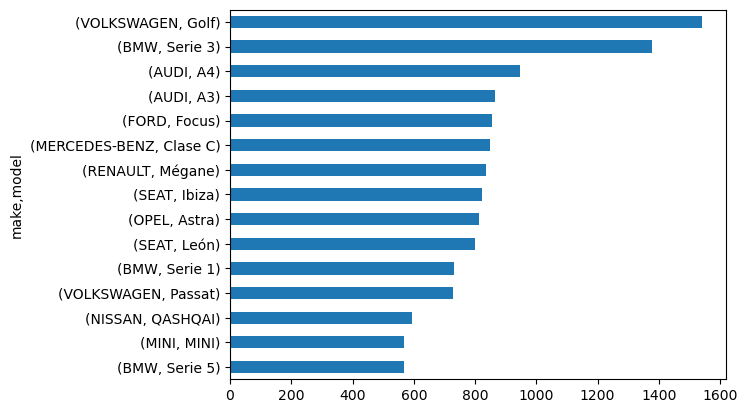

In [8]:
df[['make','model']].value_counts().head(15).sort_values().plot.barh();

In [9]:
round(df['price'].mean(),2)

15166.27

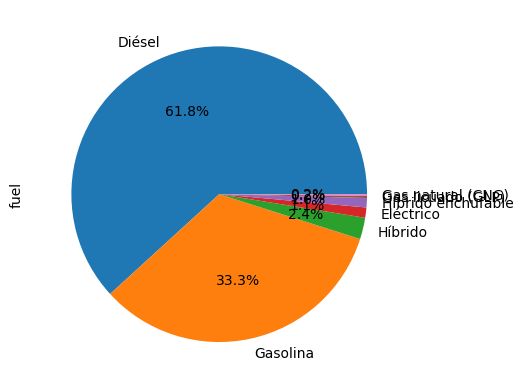

In [10]:
df.fuel.value_counts().plot.pie(autopct='%1.1f%%');

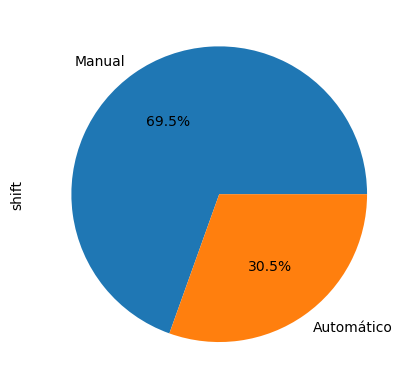

In [11]:
df['shift'].value_counts().plot.pie(autopct='%1.1f%%');

In [12]:
df['color'].nunique()

3565

Hay demasiados colores diferentes por lo que a falta de hacer una limpieza del campo obviaremos todas las preguntas relacionadas con él.

## Coche promedio

- Antigüedad media
- Kilometraje medio
- Potencia media
- Combustible máximo
- Número de puertas máximo
- Caja de cambios máximo
- Color máximo
- Calcular precio para el coche promedio. ¿Se aleja de la media de coches en venta? Intentar justificar el por qué.

In [13]:
df['year'].median()

2015.0

In [14]:
df['kms'].median()

99999.0

In [15]:
df[['fuel','doors','shift']].value_counts().head(1)

fuel    doors  shift 
Diésel  5      Manual    15624
dtype: int64

In [16]:
df[
    (df.year == df['year'].median()) &
    #(df.year <= df['year'].median()+1) & (df.year >= df['year'].median()-1) &
    (df.kms < df['kms'].median()+10000) & (df.kms > df['kms'].median()-10000) &
    (df['fuel'] == 'Diésel') & 
    (df['doors'] == 5) & 
    (df['shift'] == 'Manual') 
].price.mean()

12990.033333333333

## Relaciones características-precio

- Existe alguna relación entre el tipo de combustible y el precio? A igualdad de antigüedad y kilometraje.
- Existe alguna relación entre la antigüedad y el precio? Le afecta el kilometraje y el combustible?
- Existe alguna relación entre el kilometraje y el precio y el precio? Le afecta la antigüedad y el combustible?
- Existe alguna relación entre el cambio y el precio y el precio? Le afecta la antigüedad y el combustible?

In [17]:
df.groupby('fuel')['year'].mean().sort_values(ascending = False)

fuel
Híbrido enchufable    2018.738281
Eléctrico             2018.358423
Gas natural (CNG)     2018.318681
Gas licuado (GLP)     2017.929825
Híbrido               2017.446337
Gasolina              2012.103204
Diésel                2011.970323
Name: year, dtype: float64

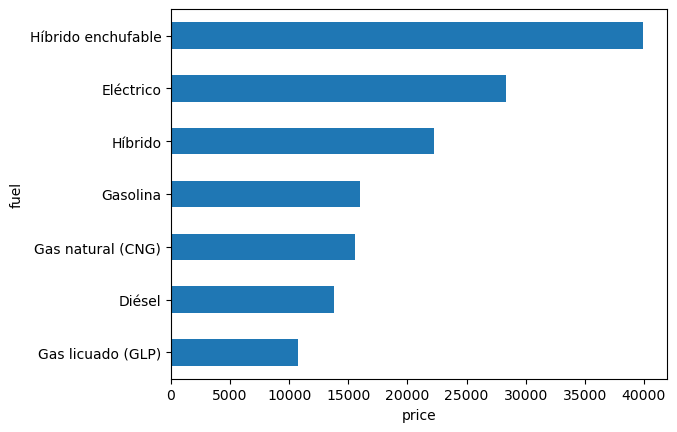

In [18]:
df.groupby('fuel')['price'].mean().sort_values().plot.barh(xlabel = 'price');

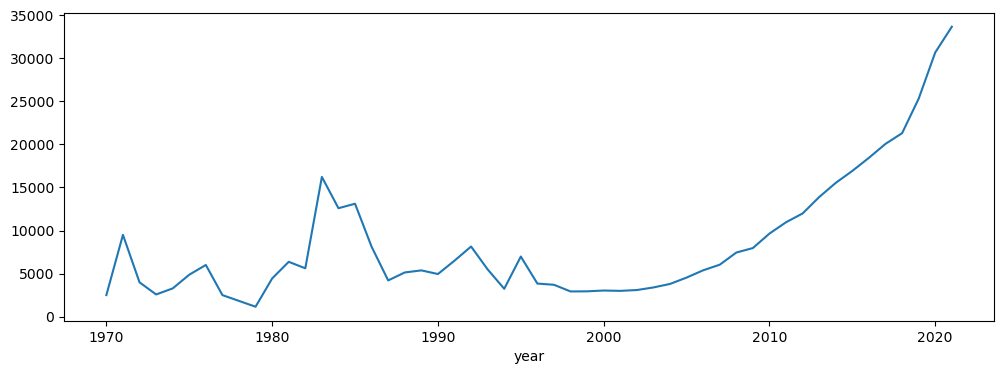

In [19]:
plt.figure(figsize = (12,4))
df.groupby('year')['price'].mean().sort_index().plot();

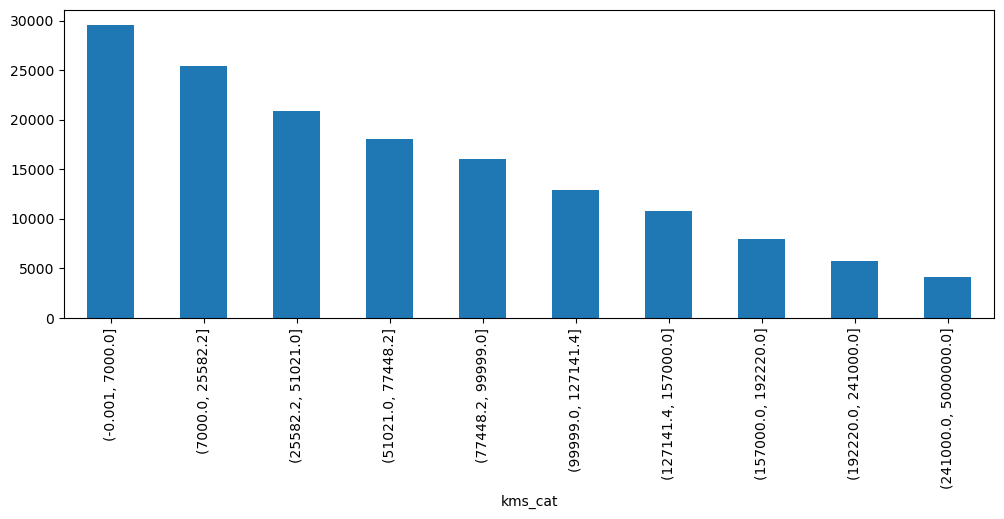

In [20]:
plt.figure(figsize = (12,4))
df.groupby('kms_cat')['price'].mean().sort_index().plot.bar();

In [21]:
plt.figure(figsize = (12,4))
df.groupby('shift')['price'].mean().sort_index()

shift
Automático    26093.953164
Manual        10387.072650
Name: price, dtype: float64

<Figure size 1200x400 with 0 Axes>

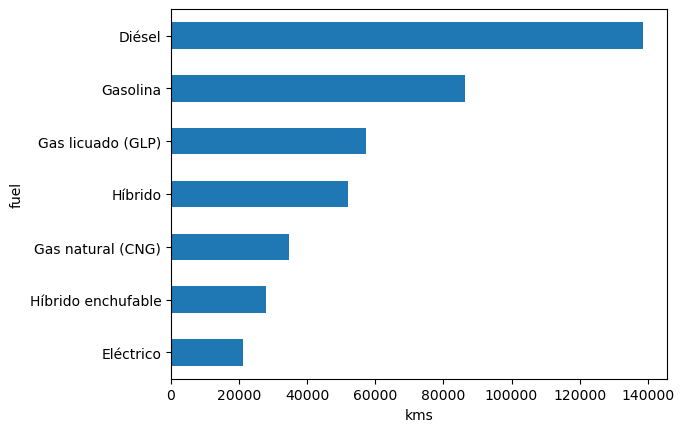

In [22]:
df.groupby('fuel')['kms'].mean().sort_values().plot.barh(xlabel = 'kms');

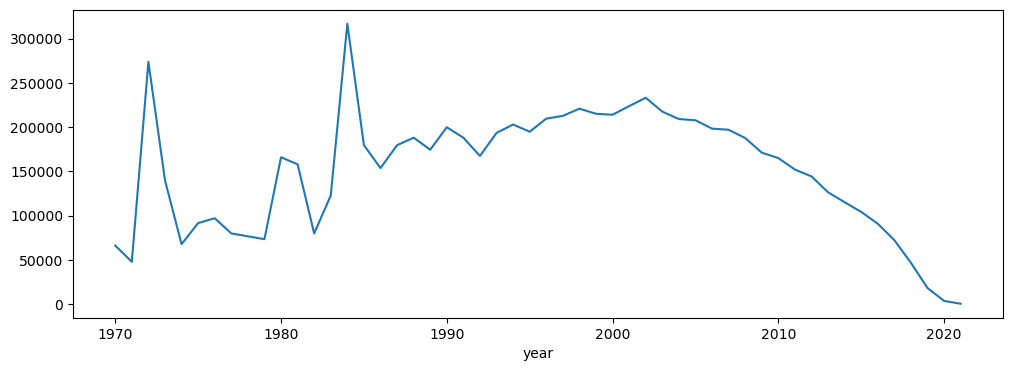

In [23]:
plt.figure(figsize = (12,4))
df.groupby('year')['kms'].mean().sort_index().plot();

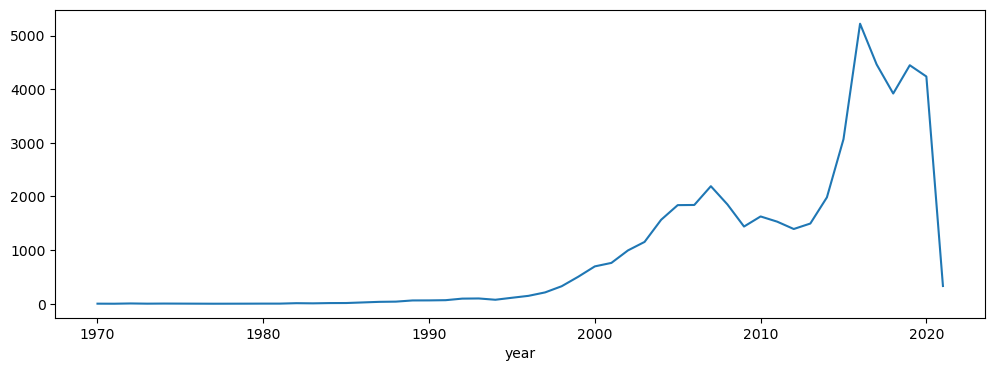

In [24]:
plt.figure(figsize = (12,4))
df.groupby('year')['price'].count().sort_index().plot();

## Datos comerciales

- Distribución de vendedores profesionales-particulares
- Top 10 vendedores con más anuncios. Precio medio de anuncio en vendedores profesionales. Hay diferencias significativas?
- Existen diferencias de precios entre vendedores profesionales y particulares?

<AxesSubplot: ylabel='is_professional'>

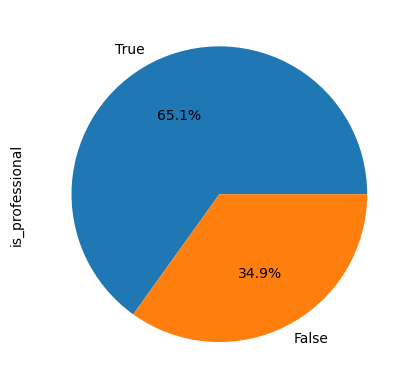

In [25]:
df.is_professional.value_counts().plot.pie(autopct='%1.1f%%')

In [26]:
df[df.is_professional == True].dealer.value_counts().head(10).sort_index()

Ald Automotive        199
Autohero              273
CarNext.com           344
Clicars               256
Flexicar Barcelona    263
Flexicar Málaga       215
Flexicar Sevilla      290
Flexicar Valencia     321
Flexicar Vizcaya      177
Ocasion Plus          883
Name: dealer, dtype: int64

In [27]:
df[
    df['dealer'].isin(df[df.is_professional == True].dealer.value_counts().head(10).index)
].groupby('dealer')['price'].mean().sort_index()

dealer
Ald Automotive        14325.628141
Autohero              14557.608059
CarNext.com           23001.162791
Clicars               16790.636719
Flexicar Barcelona    16249.277567
Flexicar Málaga       16252.274419
Flexicar Sevilla      17046.755172
Flexicar Valencia     16677.414330
Flexicar Vizcaya      17401.581921
Ocasion Plus          15773.073613
Name: price, dtype: float64

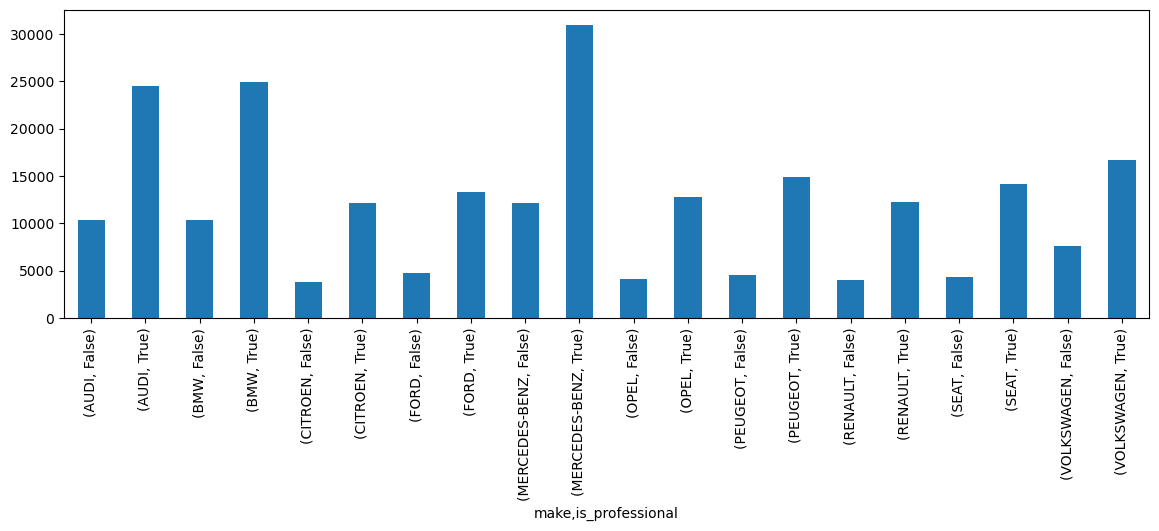

In [28]:
plt.figure(figsize = (14,4))
df[
    df['make'].isin(df['make'].value_counts().head(10).index)
].groupby(['make','is_professional'])['price'].mean().plot.bar();

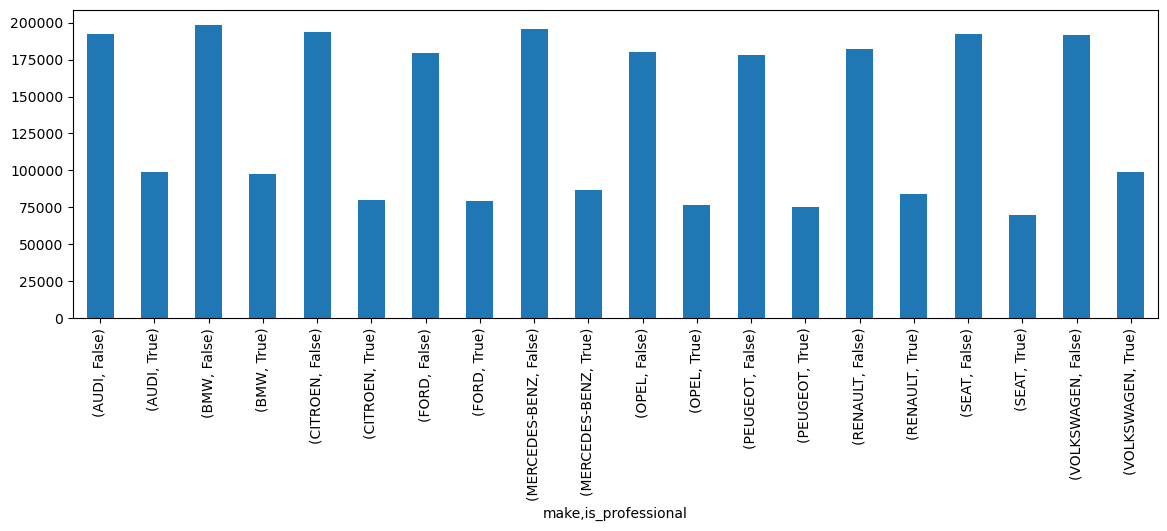

In [29]:
plt.figure(figsize = (14,4))
df[
    df['make'].isin(df['make'].value_counts().head(10).index)
].groupby(['make','is_professional'])['kms'].mean().plot.bar();

## Datos geográficos

- Distribución de anuncios por provincia
- Cuál es el precio medio por provincia?
- Top 10 de provincias más caras/baratas. Existen diferencias significativas?
- Distribución de combustibles por provincia. Hay algún dato significativo?
- Distribución de antigüedad por provincia. Hay algún dato significativo?
- Dónde se venden más coches eléctricos?

In [30]:
df.province.value_counts()

Madrid         9638
Barcelona      5856
Valencia       3533
Sevilla        2552
Málaga         2303
Alicante       2103
Vizcaya        1392
Murcia         1364
Las Palmas     1136
Zaragoza       1055
A Coruña        993
Pontevedra      956
Granada         890
Tarragona       872
Asturias        864
Baleares        743
Tenerife        727
Badajoz         722
Toledo          705
Girona          650
Navarra         649
Castellón       641
Córdoba         616
Cádiz           605
Valladolid      589
Cantabria       560
Guipúzcoa       526
Jaén            489
Burgos          487
Almería         481
Salamanca       471
Lleida          469
Ciudad Real     445
Álava           409
Albacete        375
Lugo            369
Huelva          366
León            357
Cáceres         326
La Rioja        302
Orense          237
Guadalajara     188
Huesca          163
Ávila           143
Cuenca          133
Zamora          121
Segovia         120
Palencia        112
Teruel          109
Soria            53


In [31]:
df.groupby('province')['price'].mean().sort_values(ascending = False)

province
Burgos         18221.199179
Barcelona      17237.967213
Girona         16899.483077
Álava          16727.797066
Madrid         16656.879954
Málaga         16356.070777
Valencia       16298.506935
Huesca         16140.380368
Guipúzcoa      15975.268061
Vizcaya        15924.375718
Asturias       15667.866898
Navarra        15400.622496
A Coruña       15312.108761
Zamora         15281.264463
Ávila          15132.489510
Salamanca      15037.307856
La Rioja       15035.006623
Pontevedra     14812.720711
Alicante       14671.893485
Cantabria      14559.612500
León           14344.789916
Teruel         14305.000000
Toledo         14261.075177
Sevilla        14238.278997
Orense         14108.409283
Zaragoza       14038.145972
Tarragona      14009.589450
Lugo           13949.417344
Palencia       13749.116071
Valladolid     13724.862479
Segovia        13617.883333
Lleida         13611.360341
Castellón      13579.491420
Soria          13487.811321
Murcia         13380.909091
Albacete   

In [32]:
# Agrupar por provincia y fuel y contar el número de registros
grouped = df.groupby(['province', 'fuel'])['fuel'].count()

# Obtener el fuel con más registros por provincia
idx = grouped.groupby('province').idxmax()
result = grouped.loc[idx]

# Imprimir los resultados
print(result)

province     fuel    
A Coruña     Diésel       704
Albacete     Diésel       261
Alicante     Diésel      1244
Almería      Diésel       355
Asturias     Diésel       539
Badajoz      Diésel       569
Baleares     Gasolina     390
Barcelona    Diésel      3152
Burgos       Diésel       295
Cantabria    Diésel       374
Castellón    Diésel       386
Ceuta        Diésel         9
Ciudad Real  Diésel       344
Cuenca       Diésel        94
Cáceres      Diésel       228
Cádiz        Diésel       420
Córdoba      Diésel       453
Girona       Diésel       379
Granada      Diésel       604
Guadalajara  Diésel       119
Guipúzcoa    Diésel       344
Huelva       Diésel       249
Huesca       Diésel       101
Jaén         Diésel       374
La Rioja     Diésel       195
Las Palmas   Gasolina     688
León         Diésel       228
Lleida       Diésel       309
Lugo         Diésel       236
Madrid       Diésel      5896
Melilla      Diésel        14
Murcia       Diésel       924
Málaga       Diése

In [33]:
df[df.fuel == 'Eléctrico'].province.value_counts()

Madrid         150
Barcelona       72
Valencia        33
Vizcaya         21
Málaga          16
Murcia          15
Zaragoza        14
Sevilla         14
Asturias        14
Alicante        13
Pontevedra      13
A Coruña        11
Toledo          11
Girona          10
Álava           10
Las Palmas       9
Tarragona        9
Burgos           9
Cádiz            9
Castellón        7
Guipúzcoa        7
Córdoba          6
Salamanca        6
Lleida           6
Cáceres          6
Baleares         5
Segovia          5
Valladolid       5
Zamora           5
Cantabria        5
Orense           4
Navarra          4
Badajoz          3
Albacete         3
Ciudad Real      3
León             3
Jaén             3
Tenerife         3
Guadalajara      2
Huelva           2
Lugo             2
Almería          2
Granada          2
Ávila            2
Soria            1
Cuenca           1
Huesca           1
La Rioja         1
Name: province, dtype: int64

In [34]:
mapa = gpd.read_file('../data/provincias-espanolas.geojson')

mapa.texto.replace({'Santa Cruz de Tenerife':'Tenerife','Islas Baleares':'Baleares','Gerona':'Girona','La Coruña':'A Coruña'}, inplace = True)

In [35]:
anuncios_provincia = pd.DataFrame(df.province.value_counts()).reset_index()

mapa_enr = mapa.merge(anuncios_provincia, left_on = 'texto', right_on = 'index', how = 'left')
mapa_enr.drop(columns = 'index', inplace = True)
mapa_enr.rename(columns = {'province':'num_anuncios'}, inplace = True)

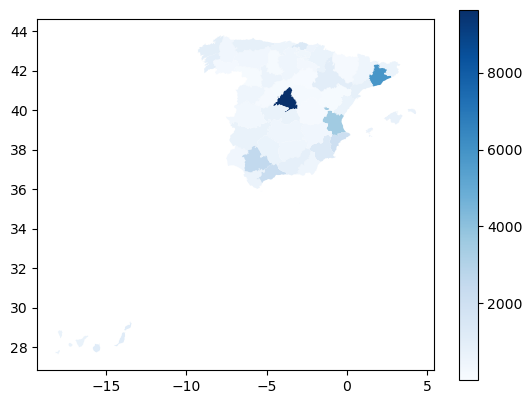

In [36]:
mapa_enr.plot(column = 'num_anuncios', cmap='Blues', linewidth=0.8, legend=True);